***Cats and Dogs dataset with CNN binary classification***
<ul>
<li> Create Test and Train ImageDataGenerators
<li> Create a convolutional neural network
<li> Compile model and train
    

In [87]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import os
import numpy as np
#from google.colab import files
from tensorflow.keras.preprocessing import image

from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input

# Assign training and validation set directories
base_dir = '/data/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

***Get the Data***

In [ ]:
# Data is from https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765

# Download data - Don't do th is every time.
# !wget --no-check-certificate \  
# "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip" \
# -O "../../data/cats-and-dogs.zip"

# Unzip data
local_zip = 'd:/data/cats-and-dogs.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('../../data')
zip_ref.close()

***Create Train Datagenerator***

In [88]:
train_datagen=ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(300,300),
    batch_size=128,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


***Create Test Datagen***

In [89]:
test_datagen=ImageDataGenerator(rescale=1./255)

test_generator = train_datagen.flow_from_directory(
    validation_dir,
    target_size=(300,300),
    batch_size=128,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


***Create Convolutional Neural Network***

In [90]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

#model.summary()

***Compile and train***

In [91]:
model.compile(loss='binary_crossentropy',
    optimizer=RMSprop(learning_rate=0.001),
    metrics=['accuracy'])

In [92]:
history=model.fit(
    train_generator,
    steps_per_epoch=15,
    epochs=10,
    validation_data=train_generator,
    validation_steps=8,
    verbose=1
)

Epoch 1/10
15/15 [==============================] - 15s 919ms/step - loss: 3.5966 - accuracy: 0.4995 - val_loss: 0.6873 - val_accuracy: 0.5068
Epoch 2/10
15/15 [==============================] - 9s 601ms/step - loss: 0.6995 - accuracy: 0.5224 - val_loss: 0.6825 - val_accuracy: 0.5049
Epoch 3/10
15/15 [==============================] - 9s 609ms/step - loss: 0.6785 - accuracy: 0.5823 - val_loss: 0.6640 - val_accuracy: 0.5264
Epoch 4/10
15/15 [==============================] - 9s 583ms/step - loss: 0.6927 - accuracy: 0.6026 - val_loss: 0.6222 - val_accuracy: 0.7578
Epoch 5/10
15/15 [==============================] - 9s 566ms/step - loss: 0.6535 - accuracy: 0.6597 - val_loss: 0.5813 - val_accuracy: 0.7773
Epoch 6/10
15/15 [==============================] - 9s 568ms/step - loss: 0.5725 - accuracy: 0.7153 - val_loss: 0.4891 - val_accuracy: 0.8018
Epoch 7/10
15/15 [==============================] - 9s 589ms/step - loss: 0.6647 - accuracy: 0.6955 - val_loss: 0.4861 - val_accuracy: 0.8145
Epoch

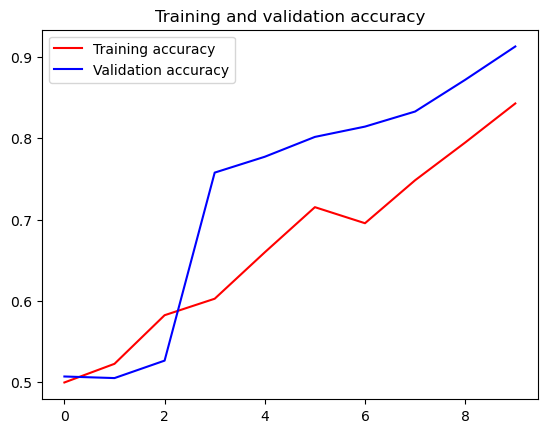

<Figure size 640x480 with 0 Axes>

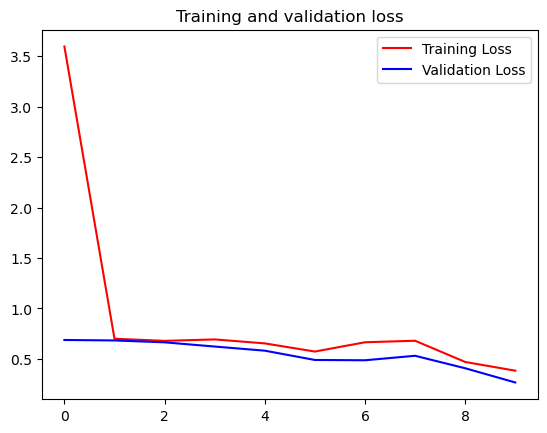

<Figure size 640x480 with 0 Axes>

In [93]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------


epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------

plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

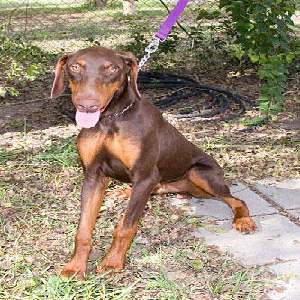

Predition: [[1.]]


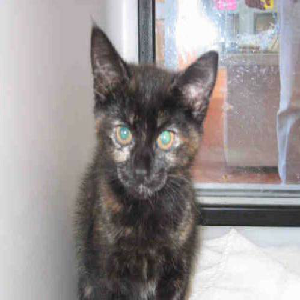

Predition: [[0.]]


In [94]:
image1=load_img(os.path.join(validation_dir,'dogs/dog.2152.jpg'), target_size=((300,300)))
image2=load_img(os.path.join(validation_dir,'cats/cat.2034.jpg'), target_size=((300,300)))
for image in [image1,image2]:
    display(image)
    imgarray=img_to_array(image)
    imgarray=imgarray.reshape(1,300,300,-1)
    #imgarray=preprocess_input(imgarray)
    print('Predition: {}'.format(model.predict(imgarray)))